In [ ]:
# function ClickConnect(){
#    console.log("Working"); 
#    document.querySelector("colab-toolbar-button").click() 
# } setInterval(ClickConnect, 1800000)

# seed fixing for reproduction 
import torch 
import random as rn 
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore
seed_everything(37)

seed_num=37
np.random.seed(seed_num)
rn.seed(seed_num) 
tf.random.set_seed(seed_num)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(config=session_conf)
K.set_session(sess)

class config:   
    seed = 37  
    device = "cuda:0"            

def seed_everything(seed: int = 37):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)
seed_everything(config.seed)
tf.random.set_seed(37) # tensorflow global seed 
print(config.seed)   

37


In [ ]:
!pip install optuna 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt   
import matplotlib.patches as mpathces 
import seaborn as sns 

# Sequential Modeling PYTORCH
import torch 
import torch.nn as nn 
import torch.optim as optim 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier

# sequential model modeling 
import tensorflow as tf
from tensorflow import keras 
from keras import backend as K 
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, BatchNormalization, Conv2D, Flatten  
from keras import optimizers, metrics, callbacks
from tensorflow.keras.backend import clear_session

import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_contour

# GoodleDrive mount
from google.colab import drive   
drive.mount('/content/drive')   

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class','Y_Quality'])
train_y = train_df['Y_Class']
test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])   

# 1) qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']
for i in qual_col:
    le = LabelEncoder()    # TRY one-hot encoding 
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 

# 2) Missing Values 
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

# 3) scaling: only `X_???` values (continuous)
Xs = train_x.select_dtypes(include=float).iloc[:,1:].columns.tolist()
scaler = StandardScaler().fit(train_x.loc[:, Xs])
train_x.loc[:, Xs] = scaler.transform(train_x.loc[:, Xs])
test_x.loc[:, Xs] = scaler.transform(test_x.loc[:, Xs])   
print('Done.')

X_train, X_test, y_train, y_test=train_test_split(train_x, train_y, test_size=0.3, random_state=37)

Done.


# 1.Sequential Model

Train on 478 samples, validate on 120 samples
Epoch 1/5
 80/478 [====>.........................] - ETA: 2s - loss: 1.4597 - acc: 0.3375

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


478/478 [==============================] - 2s 4ms/sample - loss: 6.9890 - acc: 0.5063 - val_loss: 4.7869 - val_acc: 0.2083
Epoch 2/5
478/478 [==============================] - 0s 84us/sample - loss: 3.3008 - acc: 0.6004 - val_loss: 3.8317 - val_acc: 0.6250
Epoch 3/5
478/478 [==============================] - 0s 83us/sample - loss: 2.7631 - acc: 0.6757 - val_loss: 2.7948 - val_acc: 0.6417
Epoch 4/5
478/478 [==============================] - 0s 83us/sample - loss: 2.2437 - acc: 0.6904 - val_loss: 2.1055 - val_acc: 0.5917
Epoch 5/5
478/478 [==============================] - 0s 81us/sample - loss: 1.6730 - acc: 0.6360 - val_loss: 2.4212 - val_acc: 0.6667


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


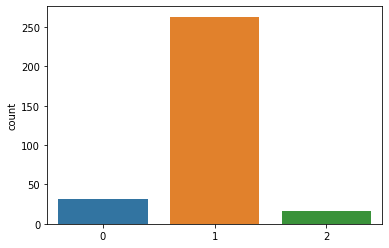

In [ ]:
model = Sequential([
        # Input layer: ReLU (decide input size according to dimension)
        Dense(512, activation='LeakyReLU', input_shape=(train_x.shape[-1],)),    
        # BatchNormalization(), 
        Dropout(0.3), 

        # Output layer: softmax 
        Dense(3, activation='softmax')  

        ])

model.compile(optimizer = optimizers.Adam(1e-3),  # default learning rate=1e-3 
              loss='sparse_categorical_crossentropy',  # tow or more label classes (`Y_Class`: 0,1,2)
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=5,
                    batch_size=80,  # batch size: 2^x && half of data size(598/2) 
                    validation_split=0.2,
                    )   
preds = model.predict(test_x)
a=[]
for i in preds: 
    i = list(i)
    a.append(i.index(max(i)))
sns.countplot(x=a);    

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
submit['Y_Class'] = a

submit.to_csv('LReluDO3b80ep5LR1e3-ANN-smartFactorySubmission.csv', index=False)

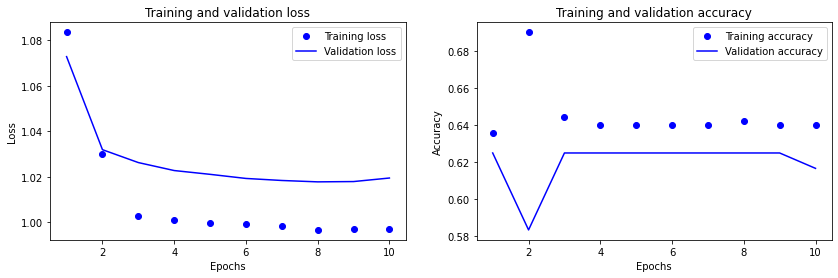

In [ ]:
epochs = range(1, len(history.history["loss"]) + 1)

fig, axes = plt.subplots(1,2,figsize=(14,4))
ax= axes.flatten()
a, b = ax[0], ax[1]

a.plot(epochs, history.history["loss"], "bo", label="Training loss")
a.plot(epochs, history.history["val_loss"], "b", label="Validation loss")
a.set_title("Training and validation loss")
a.set_xlabel("Epochs")
a.set_ylabel("Loss")
a.legend()   

b.plot(epochs, history.history["accuracy"], "bo", label="Training accuracy")
b.plot(epochs, history.history["val_accuracy"], "b", label="Validation accuracy")
b.set_title("Training and validation accuracy")
b.set_xlabel("Epochs")
b.set_ylabel("Accuracy")
b.legend();

# 1.1 Optuna 

In [ ]:
import torch

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):
        self.labels = [0 if label == 0 else 1 for label in df['HeartDisease']]
        self.features = df.drop(columns=['HeartDisease'], axis=1).values.tolist()

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_features(self, idx):
        return np.array(self.features[idx])

    def __getitem__(self, idx):
        batch_features = self.get_batch_features(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_features, batch_y

In [ ]:
def objective(trial):

    params = {
              'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
              'optimizer': trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"]),
              'n_unit': trial.suggest_int("n_unit", 4, 18)
              }
    
    model = build_model(params)
    
    accuracy = train_and_evaluate(params, model)

    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=30)

[I 2023-02-26 13:16:04,739] A new study created in memory with name: no-name-18123d27-0eb4-4209-9d15-b9575511aa52


In [ ]:
def build_model(params):
    
    in_features = train_x.shape[-1]
    
    return nn.Sequential(
    
        nn.Linear(in_features, params['n_unit']),
        nn.LeakyReLU(),

        nn.Linear(params['n_unit'], 2),
        nn.LeakyReLU()
        
    )
 

In [ ]:

# Train and evaluate the accuarcy of neural network model
def train_and_evaluate(param, model):
    
    df = pd.read_csv('heart.csv')
    df = pd.get_dummies(df)
    
    train_data, val_data = train_test_split(df, test_size = 0.2, random_state = 42)
    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = getattr(optim, param['optimizer'])(model.parameters(), lr= param['learning_rate'])

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(EPOCHS):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in train_dataloader:

                train_label = train_label.to(device)
                train_input = train_input.to(device)

                output = model(train_input.float())
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    val_input = val_input.to(device)

                    output = model(val_input.float())

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            accuracy = total_acc_val/len(val_data)

    return accuracy
  
 # Define a set of hyperparameter values, build the model, train the model, and evaluate the accuracy 
def objective(trial):

     params = {
              'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
              'optimizer': trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"]),
              'n_unit': trial.suggest_int("n_unit", 4, 18)
              }
    
     model = build_model(params)
    
     accuracy = train_and_evaluate(params, model)

     return accuracy

# THE END